In [18]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn import svm
from sklearn import cross_validation
import numpy as np
%matplotlib inline

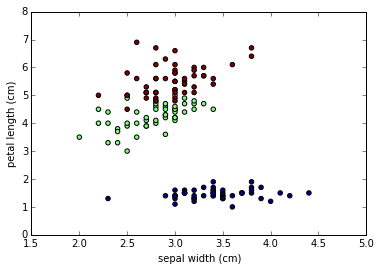

In [4]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

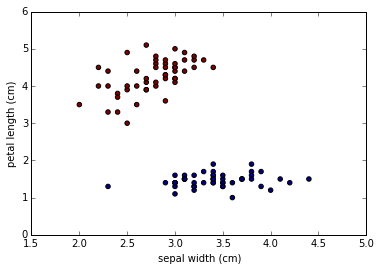

In [5]:
plt.scatter(iris.data[0:100, 1], iris.data[0:100, 2], c=iris.target[0:100])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

In [8]:
svc = svm.SVC(kernel='linear')
X = iris.data[0:100, 1:3]
y = iris.target[0:100]
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

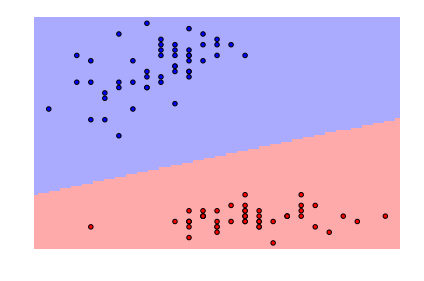

In [11]:
#Adapted from https://github.com/jakevdp/sklearn_scipy2013
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

plot_estimator(svc, X, y)

In [16]:
iris.data.shape, iris.target.shape
((150, 4), (150,))

((150, 4), (150,))

In [19]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [20]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [22]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [23]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [24]:
clf.score(X_test, y_test) 

0.96666666666666667

In [25]:
clf = svm.SVC(kernel='linear', C=1)

In [26]:
scores = cross_validation.cross_val_score(clf, iris.data, iris.target, cv=5)

In [27]:
scores

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])